
# Regressão Linear Simples



### Bibliotecas


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Baixando os Dados

Para isso usaremos o !wget  para fazer o download do site da IBM (IBM Object Storage)


In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-05-24 14:12:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2022-05-24 14:12:43 (1.91 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Entendendo os dados

### `FuelConsumption.csv`:

Baixamos um conjunto de dados de consumo de combustível, **`FuelConsumption.csv`**, que contém classificações de consumo de combustível específicas para cada modelo e emissões de dióxido de carbono estimadas para veículos leves novos para venda no varejo no Canadá.[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Lendo os dados



In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploração dos dados

In [5]:
# resumindo os dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


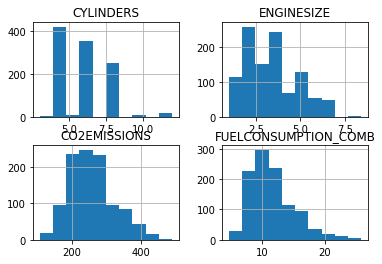

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

- Plotando cada uma das features com a Emissão para ver o quão linear a relação é 

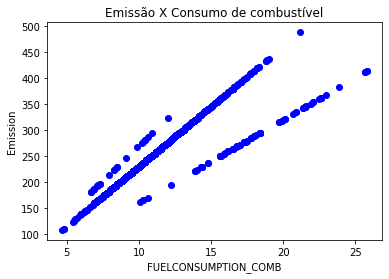

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.title("Emissão X Consumo de combustível")
plt.show()


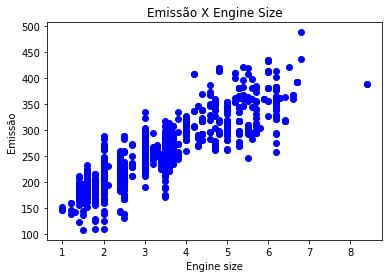

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emissão")
plt.title("Emissão X Engine Size")
plt.show()

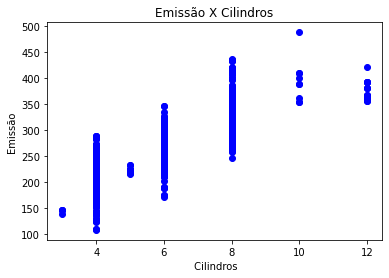

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel(" Cilindros")
plt.ylabel("Emissão")
plt.title("Emissão X Cilindros")
plt.show()

#### Train/Test Split

Train/Test Split envolve a divisão do conjunto de dados em conjuntos de treinamento e testes mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de testes.
Isto proporcionará uma avaliação mais precisa da precisão fora da amostra, pois o conjunto de dados de teste não faz parte do conjunto de dados que foram usados para treinar o modelo. Portanto, nos dá uma melhor compreensão de quão bem nosso modelo se generaliza sobre os novos dados.

Isto significa que conhecemos o resultado de cada ponto de dados no conjunto de dados de teste, o que faz com que seja ótimo testar! Como estes dados não foram usados para treinar o modelo, o modelo não tem conhecimento do resultado destes pontos de dados. Portanto, em essência, é realmente um teste fora da amostra.

Vamos dividir nosso conjunto de dados em conjuntos de teste e treino. 80% de todo o conjunto de dados será usado para treinamento e 20% para testes. Criamos uma máscara para selecionar linhas aleatórias usando a função **np.random.rand()**:


In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Modelo de Regressão

A Regressão linear se encaixa em um modelo linear com coeficientes B = (B1, ..., Bn) para minimizar a 'soma residual dos quadrados' entre o valor real y no conjunto de dados, e o valor previsto yhat (y^) usando a aproximação linear.


#### Distribuição dos dados de TREINO(train)


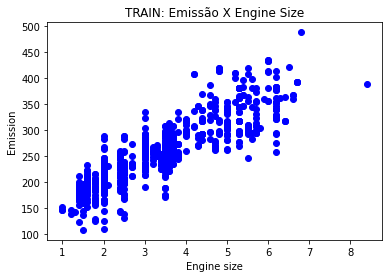

In [12]:
# Observando os 80% usados para o treino 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("TRAIN: Emissão X Engine Size")
plt.show()

#### Modelando


In [13]:
# Importa a biblioteca
from sklearn import linear_model
regr = linear_model.LinearRegression()
#Faz o treinamento de X e Y(o que queremos prever)
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
#passa o fit na regressão com esses dois treinos 
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.43130265]]
Intercept:  [127.52007919]


Como mencionado anteriormente, **Coeficiente** e **Interceptar** na regressão linear simples, são os parâmetros da linha de ajuste.
Como se trata de uma regressão linear simples, com apenas 2 parâmetros, e sabendo que os parâmetros são a interceptação e a inclinação da linha, o sklearn pode estimá-los diretamente a partir de nossos dados.
Observe que todos os dados devem estar disponíveis para atravessar e calcular os parâmetros.

#### Plotando os outputs


Usando o FIT line


Text(0, 0.5, 'Emissão')

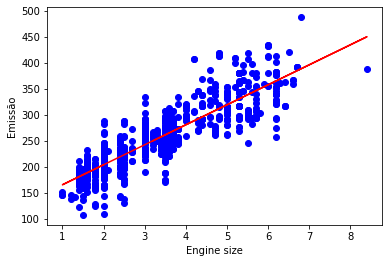

In [14]:
# FIT line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emissão")

#### Evaluation Metrics 

Comparamos os valores reais e os valores previstos para calcular a precisão de um modelo de regressão. As métricas de avaliação fornecem um papel fundamental no desenvolvimento de um modelo, uma vez que fornecem insights para áreas que requerem melhorias.

Existem diferentes métricas de avaliação de modelos, vamos usar o MSE aqui para calcular a precisão de nosso modelo com base no conjunto de testes:

* Erro Médio Absoluto: É a média do valor absoluto dos erros. Esta é a métrica mais fácil de entender, uma vez que é apenas um erro médio.

* Erro Médio Quadrático (MSE): O erro médio quadrático (MSE) é a média do erro quadrático. É mais popular do que o erro médio absoluto porque o foco está mais voltado para erros grandes. Isto se deve ao termo quadrado que aumenta exponencialmente os erros maiores em comparação com os menores.

* Erro de Raiz Média Quadrática de Erro (RMSE).

* O quadrado R não é um erro, mas sim uma métrica popular para medir o desempenho de seu modelo de regressão. Ela representa quão próximos os pontos de dados estão da linha de regressão ajustada. Quanto mais alto o valor R-quadrado, melhor o modelo se ajusta aos seus dados. A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).



In [15]:
from sklearn.metrics import r2_score

# Agora com os valores de teste
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
#prediction
test_y_ = regr.predict(test_x) 

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error (MAE): 22.77
Residual sum of squares (MSE): 896.53
R2-score: 0.80


## Para praticar


Vamos ver quais são as métricas de avaliação se treinamos um modelo de regressão utilizando o recurso `FUELCONSUMPTION_COMB`.

Comece selecionando `FUELCONSUMPTION_COMB` como os dados do train_x  do `train` dataframe, depois selecione `FUELCONSUMPTION_COMB` como os dados de test_x do `test` dataframe


In [16]:
# Ou seja, mudando apenas os X mas mantendo os Y 
train_x = train[['FUELCONSUMPTION_COMB']]


test_x = test[['FUELCONSUMPTION_COMB']]

Agora treinando a Regressão usando os novos train_x e train_y

In [17]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)


LinearRegression()

Predições

In [18]:
predictions =regr.predict(test_x)

Utilizando os dados `predictions` e `test_y` e encontrar o valor do erro médio absoluto utilizando as funções `np.absolute` e `np.mean`.


In [19]:
print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(predictions  - test_y)))


Mean absolute error (MAE): 21.92


O MAE é muito pior quando treinamos os dados usando `ENGINESIZE` do que com o `FUELCONSUMPTION_COMB`